### Professor: Dieval Guizelini
### Estudante: Clístenes Grizafis Bento

# Atividade 03: Representação de texto usando PCA

Escolha um texto pequeno e qualquer modelo para transformá-lo em uma representação vetorial. Plot os vetores com PCA, demonstrando as orações ou as palavras representadas pelo vetor.

## Instalação e importação das bibliotecas

In [8]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-03-31 00:42:10--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-03-31 00:42:11--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.10MB/s    in 2m 39s  

2023-03-31 00:44:50 (5.18 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pickle
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Importando texto

In [10]:
with open ('/content/Alice No Pais Das Maravilhas - Lewis Carroll.txt') as f:
  book = f.read()

## Criação de métodos

### Converter texto em representação vetorial, somando os vetores de cada palavra

In [11]:
def load_glove_model(file_path):
    with open(file_path, 'rb') as f:
        model = {}
        for line in f:
            values = line.split()
            word = values[0].decode('utf-8')
            coefs = np.asarray(values[1:], dtype='float32')
            model[word] = coefs
    return model

modelo_glove = load_glove_model('glove.6B.100d.txt')

## Aplicação

In [12]:
words = book.split()
vectors = np.zeros((len(words), 100))

for i, word in enumerate(words):
    if word in modelo_glove:
        vectors[i, :] = modelo_glove[word]
    else:
        vectors[i, :] = np.zeros(100)
    
vectorial_text = np.mean(vectors, axis=0)

## Nuvem com as palavras do Vetor

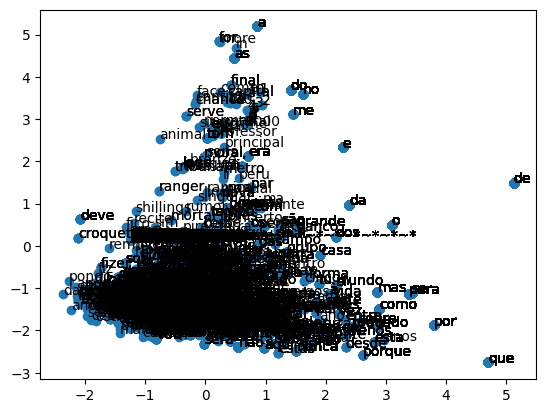

In [13]:
pca = PCA(n_components=2)
vectorial_text = pca.fit_transform(vectors)
plt.scatter(vectorial_text[:, 0], vectorial_text[:, 1])

for i, palavra in enumerate(words):
    plt.annotate(palavra, (vectorial_text[i, 0], vectorial_text[i, 1]))

plt.show()